In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1. 선형 회귀

In [ ]:
# advertising.csv (광고(TV, Radio, Newspaper) 및 판매량(Sales) 데이터셋)
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
# csv파일 dataframe으로 읽어들이기
advertising = pd.DataFrame(pd.read_csv('advertising.csv'))

## 탐색적 데이터 분석


In [ ]:
# 첫 5행 출력
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# 데이터프레임 shape 츨력
advertising.shape

(200, 4)

In [ ]:
# 컬럼별 통계량 출력
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# 결측치 확인
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

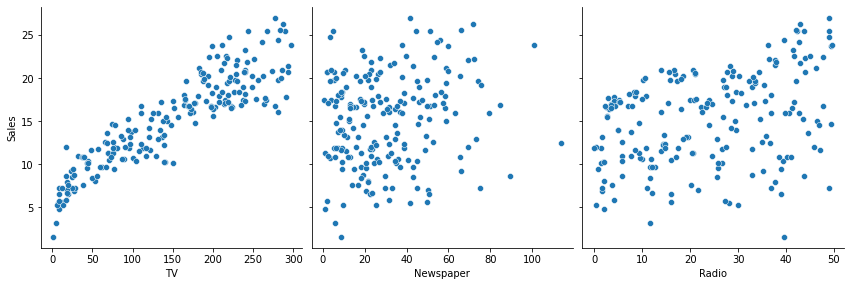

In [ ]:
# scatter plot을 사용해 Sales와 나머지 변수 간의 관계 확인
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

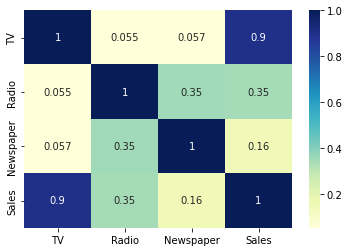

In [ ]:
# 변수 간의 correlation 확인 (힌트 : seaborn의 heatmap, dataframe의 corr() 사용)
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

## 모델 생성, 학습

In [ ]:
# scatterplot과 heatmap에서 볼 수 있듯이, Sales와 가장 상관관계가 높은 변수가 TV이므로 
# TV 변수만을 이용해 simple linear regression 하자.

# +) 변수가 하나일 때 추정한 선형모델이 잘 fitting되는지 2차원 그래프에서 확인하기 쉬워서 변수를 하나만 선택했다.
# 실제로는 여러 변수를 사용하고, 기존 변수들로부터 새로운 변수를 만들어내기도 한다. 
# 이러한 feature engineering 과정은 ML에서 핵심적이다.

X = advertising['TV']
y = advertising['Sales']

In [ ]:
# train-test split (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 선형 회귀 모델 생성
lr = LinearRegression()

# 학습 데이터를 이용해 모델 학습
lr.fit(X_train[:, None], y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


LinearRegression()

In [ ]:
# The coefficients
print("Coefficients: \n", lr.coef_)
# The intercept
print("Intercept: \n", lr.intercept_)

Coefficients: 
 [0.05483488]
Intercept: 
 7.206554548173251


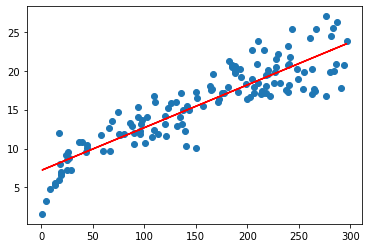

In [ ]:
# 학습 데이터 산점도를 그리고, 추정한 선형 모델을 표시해 잘 fitting되었는지 확인한다.

plt.scatter(X_train, y_train)
plt.plot(X_train, lr.intercept_ + lr.coef_*X_train, 'r')
plt.show()

## 모델 evaluation

In [ ]:
# 학습시킨 모델로 예측
y_pred = lr.predict(X_test[:, None])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


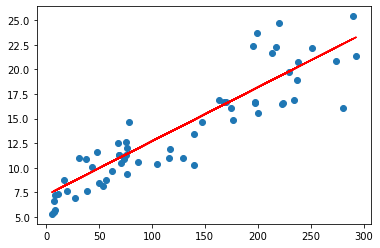

In [ ]:
# 테스트 데이터 산점도를 그리고, 추정한 선형 모델을 표시해 잘 fitting되었는지 확인한다.

plt.scatter(X_test, y_test)
plt.plot(X_test, lr.intercept_ + lr.coef_*X_test, 'r')
plt.show()

In [ ]:
# MSE
print("MSE : %.2f" % mean_squared_error(y_test, y_pred))

# R-squared
# R2 = 0.816 의미 : Sales 분산의 81.6%는 TV로 설명된다
print("R2 : %.2f" % r2_score(y_test, y_pred))

MSE : 5.18
R2 : 0.81


In [ ]:
# mse 직접 구현 (X_np, lr.coef_, lr.intercept_, y_test 및 np 함수 사용)
# sklearn의 mean_squared_error함수로 구한 것과 동일한지 확인
X_np = X_test.to_numpy()
X_np = X_np.reshape(-1, 1)
mse = np.mean((X_np @ lr.coef_ + lr.intercept_ - y_test)**2)
print(mse)

5.179525402166653


# 2. 다항 회귀

다항회귀로 당뇨병 예측 모델 만들기 

In [ ]:
#PolynomialFeatures 임포트

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#데이터 셋 준비

diabetes_dataset = datasets.load_diabetes()


## 2차식 피처로 변환

In [ ]:
#PolynomialFeatures로 2차식 변환
polynomial_transformer = PolynomialFeatures(2)
polynomial_data = polynomial_transformer.fit_transform(diabetes_dataset.data)
polynomial_feature_names = polynomial_transformer.get_feature_names(diabetes_dataset.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#X, y 준비

X = pd.DataFrame(polynomial_data, columns = polynomial_feature_names)
y = pd.DataFrame(diabetes_dataset.target, columns=['diabetes'])

#선형 회귀

In [ ]:
#데이터 스플릿 (8 : 2)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
#선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#예측
y_test_prediction = model.predict(x_test)

In [ ]:
# RMSE
print("RMSE : %.2f" % mean_squared_error(y_test, y_test_prediction) ** 0.5)

RMSE : 57.88
